In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib
/home/tmb/exp/ocropus4/venv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize', 'show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
cd ..

/home/tmb/exp/ocropus4


In [9]:
import ocrodeg
import glob
import io
import itertools as itt
import os
import random as pyrand
import re
import sys
from importlib import reload
from itertools import islice

import bs4
import click
import numpy as np
import scipy.ndimage as ndi
import webdataset as wds
from bs4 import BeautifulSoup
from lxml import etree
from matplotlib import *
from matplotlib import pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from numpy import *
from torchvision.ops import FeaturePyramidNetwork
from webdataset import WebDataset, writer
from webdataset.writer import TarWriter
from torch.utils.tensorboard import SummaryWriter
from torch import optim, nn
import torchvision
import torchvision.utils

import torch
import ocrlib.ocrmodels as models
from torch.utils.data import DataLoader, IterableDataset
from functools import partial
from ocrlib import psegutils

In [11]:
from ocrlib.segmentation import Segmenter, convert_img

In [13]:
input = "data/uw3-tess.tgz"
model="runs/segmentation/segmodel-00001767-0000215265.pth"
batchsize=1
extensions="png;jpg;jpeg"
maxcount=999999999
tilesize=1024
show=False
device="cuda"
marker_threshold=[0.2, 0.7]
separator_threshold=[0.2, 0.7]
segmenter = Segmenter(device="cpu")
segmenter.load(model)

# making  seg_lstm {}
# loaded state dict <class 'torch.nn.modules.container.Sequential'>
# loaded runs/segmentation/segmodel-00001767-0000215265.pth


pages/A001BIN


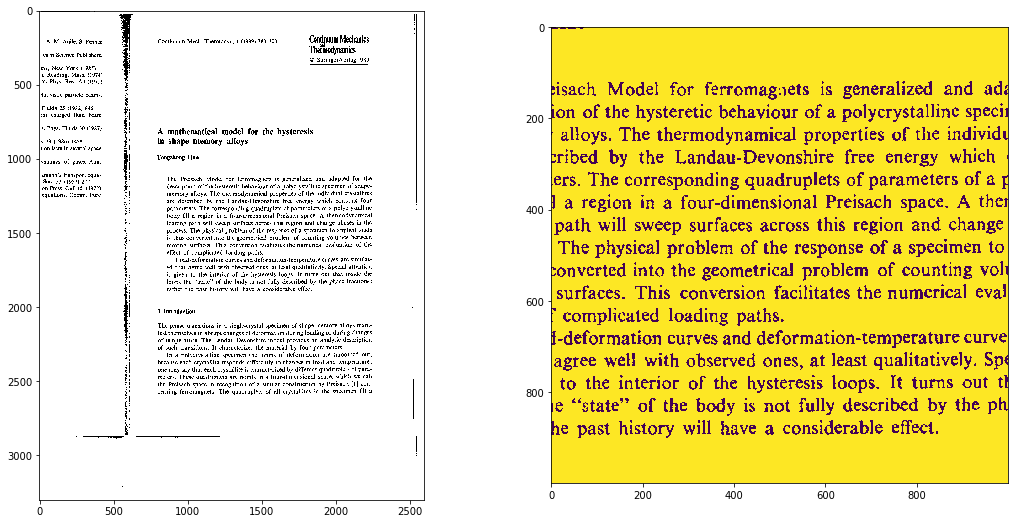

In [22]:
testing = WebDataset(input, extensions="__key__ "+extensions)
for key, image in testing:
    break
image = convert_img(image, sigma=(0.3, 0.3), noise=(0.0, 0.0))
image = image.numpy()[0]
print(key, file=sys.stderr)
figsize(18, 9); subplot(121); imshow(image, cmap=cm.gray); subplot(122); imshow(image[1000:2000, 1000:2000])
assert np.amin(image) >= 0 and np.amax(image) <= 1
probs = segmenter.predict_tiled(image, r=tilesize)

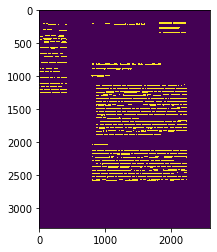

In [18]:
markers = psegutils.hysteresis_threshold(probs[:,:,2], *marker_threshold)
imshow(markers)

In [ ]:
t0.0, 0.0))
            image = im   break
            assert np.amin(image) >= 0 and np.amax(image) <= 1
            probs = segmenter.predict_tiled(image, r=tilesize)
            print("# hysteresis threshold", file=sys.stderr)
            thresholded = array([
                probs[:,:,0],
                psegutils.hysteresis_threshold(probs[:,:,1], *marker_threshold),
                psegutils.hysteresis_threshold(probs[:,:,2], *separator_threshold)
            ]).transpose(1, 2, 0)
            #clf(); imshow(probs[1]); ginput(1, 1000)
            markers = label_marked_components(thresholded, threshold=0.9, sep_threshold=0.9)
            result = {
                "__key__": key,
                "png": image,
                "probs.png": probs,
                "words.png": int2rgb(markers)
            }
            sink.write(result)
            if show > 0 and count % show ==                clf()
                subplot(221); imshow(image)
             ubplot(222); imshow((markers>0)*(0.5+0.5*sin(5.0*markers)**2), cmap=cm.inferno)
                subplot(223); imshow(probs, vmin=0, vmax=1)
                subplot(224); imshow(thresholded)
            ginput(1, 0.01)